In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import plot, ion, show, savefig, cla, figure
import random
import time

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from data_loader import DataGenerator, SoralinkDataGenerator
from models import VAEmodel, lstmKerasModel
from trainers import vaeTrainer

from utils import process_config, create_dirs, get_args

(measure_id = 'E100000M01'OR measure_id='E100001M02'OR measure_id='E100001M03'OR measure_id='E100002M02'OR measure_id='E100002M03'OR measure_id='E100003M01'OR measure_id='E100005M01'OR measure_id='E100005M02'OR measure_id='E100006M01'OR measure_id='E100006M02'OR measure_id='E100008M01'OR measure_id='E100008M02'OR measure_id='E100009M01'OR measure_id='E100010M02'OR measure_id='E100012M01'OR measure_id='E100013M01'OR measure_id='E100014M01'OR measure_id='E100015M01'OR measure_id='E100016M01'OR measure_id='E100017M01'OR measure_id='E100018M01'OR measure_id='E100019M01'OR measure_id='E100020M01'OR measure_id='E100021M01'OR measure_id='E100022M01'OR measure_id='E100023M01'OR measure_id='E100024M01'OR measure_id='E100025M01'OR measure_id='E100026M01'OR measure_id='E100027M01'OR measure_id='E100028M01'OR measure_id='E100029M03'OR measure_id='E100030M02'OR measure_id='E100031M03'OR measure_id='E100033M01'OR measure_id='E100034M01'OR measure_id='E100035M01'OR measure_id='E100036M01'OR measure_i

In [4]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

['/device:GPU:0']


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6



C:\Users\Freud\Documents\Soralink\vae\codes\data_loader.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vib"] = df[["x","y","z"]].mean(axis=1)


conv_1: Tensor("encoder/conv2d/LeakyRelu:0", shape=(None, 36, 1, 32), dtype=float32)
conv_2: Tensor("encoder/conv2d_1/LeakyRelu:0", shape=(None, 9, 1, 64), dtype=float32)
conv_3: Tensor("encoder/conv2d_2/LeakyRelu:0", shape=(None, 3, 1, 128), dtype=float32)
conv_4: Tensor("encoder/conv2d_3/LeakyRelu:0", shape=(None, 1, 1, 512), dtype=float32)
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


C:\Users\Freud\Documents\Soralink\vae\codes\models.py:108: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv_1 = tf.compat.v1.layers.conv2d(inputs=input_tensor,
C:\Users\Freud\Documents\Soralink\vae\codes\models.py:116: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv_2 = tf.compat.v1.layers.conv2d(inputs=conv_1,
C:\Users\Freud\Documents\Soralink\vae\codes\models.py:124: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv_3 = tf.compat.v1.layers.conv2d(inputs=conv_2,
C:\Users\Freud\Documents\Soralink\vae\codes\models.py:132: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv_4 = tf.compat.v1.layers.conv2d(inputs=conv_3,
C:\Users\Freud\Doc

finish encoder: 
Tensor("encoder/MultivariateNormalDiag/sample/chain_of_shift_of_scale_matvec_linear_operator/forward/shift/forward/add:0", shape=(None, 6), dtype=float32)


decoded_2 is: Tensor("decoder/Reshape_1:0", shape=(None, 3, 1, 288), dtype=float32)
decoded_3 is: Tensor("decoder/Reshape_2:0", shape=(None, 9, 1, 96), dtype=float32)
decoded_4 is: Tensor("decoder/Reshape_3:0", shape=(None, 36, 1, 24), dtype=float32)
decoded_5 is: Tensor("decoder/Reshape_4:0", shape=(None, 144, 1, 6), dtype=float32)
decoded_6 is: Tensor("decoder/conv2d_4/BiasAdd:0", shape=(None, 144, 1, 1), dtype=float32)
finish decoder: 
Tensor("decoder/Reshape_5:0", shape=(None, 144, 1), dtype=float32)


sigma2: 
Tensor("sigma2_dataset/Square:0", shape=(), dtype=float32)

The total number of trainable parameters in the encoder model is: 240772
The total number of trainable parameters in the decoder model is: 725487
The total number of trainable parameters in the sigma2_dataset model is: 0
Total number of trainabl

C:\Users\Freud\Documents\Soralink\vae\codes\models.py:164: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  decoded_1 = tf.compat.v1.layers.dense(encoded,
C:\Users\Freud\Documents\Soralink\vae\codes\models.py:270: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  decoded_2 = tf.compat.v1.layers.conv2d(decoded_1,
C:\Users\Freud\Documents\Soralink\vae\codes\models.py:278: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  decoded_3 = tf.compat.v1.layers.conv2d(decoded_2,
C:\Users\Freud\Documents\Soralink\vae\codes\models.py:289: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  decoded_4 = tf.compat.v1.layers.conv2d(decoded_3,
C:\Users\Freud\Documents\Soralink

gvs for dataset: [(<tf.Tensor 'gradients/encoder/conv2d/Conv2D_grad/tuple/control_dependency_1:0' shape=(3, 1, 1, 32) dtype=float32>, <tf.Variable 'encoder/conv2d/kernel:0' shape=(3, 1, 1, 32) dtype=float32>), (<tf.Tensor 'gradients/encoder/conv2d/BiasAdd_grad/tuple/control_dependency_1:0' shape=(32,) dtype=float32>, <tf.Variable 'encoder/conv2d/bias:0' shape=(32,) dtype=float32>), (<tf.Tensor 'gradients/encoder/conv2d_1/Conv2D_grad/tuple/control_dependency_1:0' shape=(3, 1, 32, 64) dtype=float32>, <tf.Variable 'encoder/conv2d_1/kernel:0' shape=(3, 1, 32, 64) dtype=float32>), (<tf.Tensor 'gradients/encoder/conv2d_1/BiasAdd_grad/tuple/control_dependency_1:0' shape=(64,) dtype=float32>, <tf.Variable 'encoder/conv2d_1/bias:0' shape=(64,) dtype=float32>), (<tf.Tensor 'gradients/encoder/conv2d_2/Conv2D_grad/tuple/control_dependency_1:0' shape=(3, 1, 64, 128) dtype=float32>, <tf.Variable 'encoder/conv2d_2/kernel:0' shape=(3, 1, 64, 128) dtype=float32>), (<tf.Tensor 'gradients/encoder/conv2d_

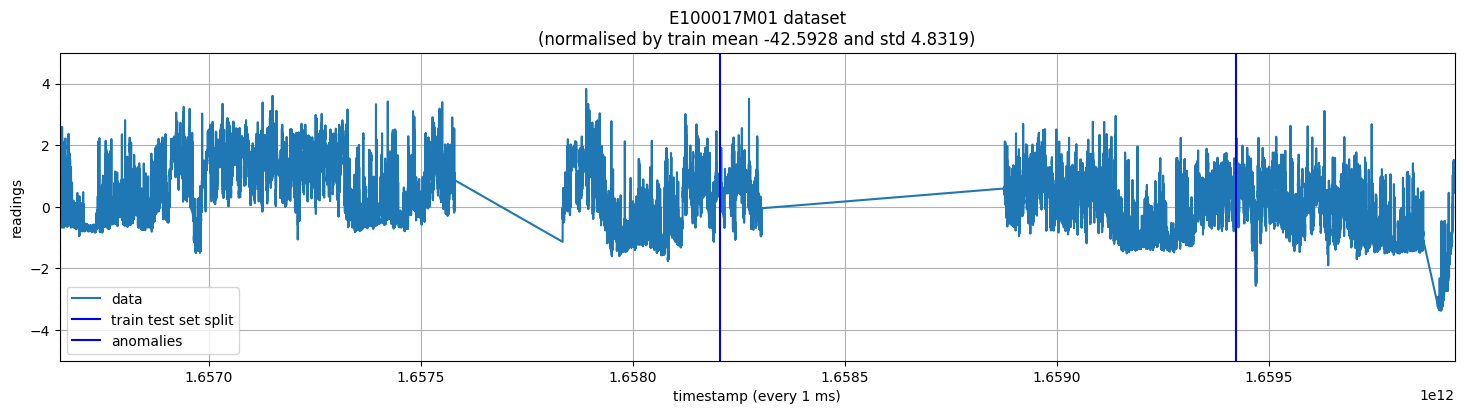

In [5]:
# load VAE model
config = process_config('NAB_config.json')
# create the experiments dirs
create_dirs([config['result_dir'], config['checkpoint_dir']])
# create tensorflow session
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
# create your data generator
data = SoralinkDataGenerator(config)
# create a CNN model
model_vae = VAEmodel(config)
# create a CNN model
trainer_vae = vaeTrainer(sess, model_vae, data, config)
model_vae.load(sess)

In [6]:
# load LSTM model
lstm_model = lstmKerasModel(data)
lstm_model.produce_embeddings(config, model_vae, data, sess)
lstm_nn_model = lstm_model.create_lstm_model(config)
lstm_nn_model.summary()   # Display the model's architecture

# checkpoint path
checkpoint_path = config['checkpoint_dir_lstm'] + "cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# load weights if possible
lstm_model.load_model(lstm_nn_model, config, checkpoint_path)

Finish processing the embeddings of the entire dataset.
The first a few embeddings are
[[ 1.55078959  1.34984851  0.4289431   0.22216688  0.76300538 -0.93843478]
 [ 1.64022934  1.41513026  0.41583914  0.17518985  0.81827945 -1.10109615]
 [ 1.78289521  1.35892987  0.42926294  0.1912159   0.88625622 -1.17027199]
 [ 1.5085603   1.20856798  0.47833288  0.21695426  0.78024    -0.90377915]
 [ 1.73945546  1.38292456  0.58535302  0.21157512  0.82028383 -0.97412723]]
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 47, 6)]           0         
                                                                 
 lstm (LSTM)                 (None, 47, 64)            18176     
                                                                 
 lstm_1 (LSTM)               (None, 47, 64)            33024     
                                                            

C:\Users\Freud\Documents\Soralink\vae\codes\data_loader.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vib"] = df[["x","y","z"]].mean(axis=1)


The given sequence has 21705 samples
(21562, 144, 1)
(14794, 48, 144, 1)


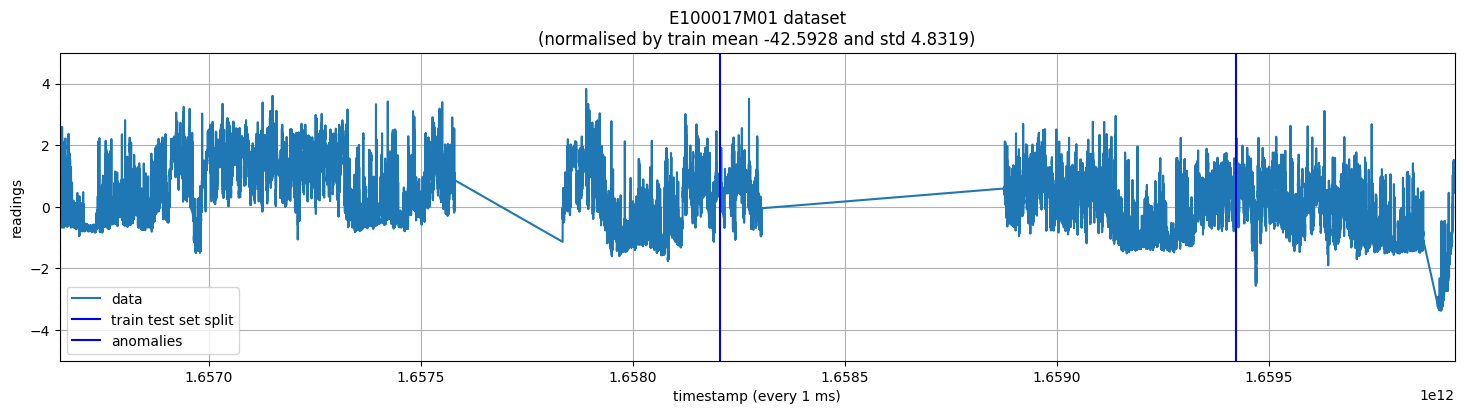

In [7]:
# load normalised time series
save_dir = '../datasets/NAB-known-anomaly/'
dataset = config['dataset']
filename = '{}.npz'.format(dataset)
data = SoralinkDataGenerator(config)
result = data.data

if dataset == 'machine_temp':
    result['test'] = result['test'][0]
    result['idx_anomaly_test'] = result['idx_anomaly_test'][0]
    result['t_test'] = result['t_test'][0]

# slice into rolling windows and rolling sequences
def slice_rolling_windows_and_sequences(config, time_seq):
    n_sample = len(time_seq)
    print("The given sequence has {} samples".format(n_sample))
    n_vae_win = n_sample - config['l_win'] + 1
    rolling_windows = np.zeros((n_vae_win, config['l_win']))
    for i in range(n_vae_win):
        rolling_windows[i] = time_seq[i:i + config['l_win']]
        sample_m = np.mean(rolling_windows, axis=1)
        sample_std = np.std(rolling_windows, axis=1)

        n_lstm_seq = n_sample - config['l_seq']*config['l_win']+1
        lstm_seq = np.zeros((n_lstm_seq, config['l_seq'], config['l_win']))
    for i in range(n_lstm_seq):
        cur_seq = time_seq[i:i+config['l_seq']*config['l_win']]
        for j in range(config['l_seq']):
            lstm_seq[i,j] = cur_seq[config['l_win']*j:config['l_win']*(j+1)]
    
    return rolling_windows, lstm_seq, sample_m, sample_std

test_windows, test_seq, test_sample_m, test_sample_std = slice_rolling_windows_and_sequences(config, result['test'])
test_windows = np.expand_dims(test_windows, -1)
test_seq = np.expand_dims(test_seq, -1)
print(test_windows.shape)
print(test_seq.shape)

In [8]:
# Evaluate ELBO and LSTM prediction error on the validation set
# evaluate some anomaly detection metrics
def evaluate_vae_anomaly_metrics_for_a_window(test_win):
    feed_dict = {model_vae.original_signal: np.expand_dims(test_win, 0),
                 model_vae.is_code_input: False,
                 model_vae.code_input: np.zeros((1, config['code_size']))}

    # VAE reconstruction error
    recons_win_vae = np.squeeze(sess.run(model_vae.decoded, feed_dict=feed_dict))
    test_vae_recons_error = np.sum(np.square(recons_win_vae - test_win))

    # VAE latent embedding likelihood
    vae_code_mean, vae_code_std = sess.run([model_vae.code_mean, model_vae.code_std_dev], feed_dict=feed_dict)
    test_vae_kl = 0.5 * (np.sum(np.square(vae_code_mean)) + \
                            np.sum(np.square(vae_code_std)) - \
                            np.sum(np.log(np.square(vae_code_std))) - config['code_size'])

    # VAE ELBO loss
    sigma2 = 0.0005
    input_dims = model_vae.input_dims
    sigma_regularisor = input_dims/2. * np.log(sigma2) + input_dims * np.pi
    test_vae_elbo = test_vae_recons_error/sigma2 + test_vae_kl + sigma_regularisor
    return test_vae_recons_error, test_vae_kl, test_vae_elbo

def evaluate_lstm_anomaly_metric_for_a_seq(test_seq):
    feed_dict = {model_vae.original_signal: test_seq,
                 model_vae.is_code_input: False,
                 model_vae.code_input: np.zeros((1, config['code_size']))}
    vae_embedding = np.squeeze(sess.run(model_vae.code_mean, feed_dict=feed_dict))
    #print(vae_embedding.shape)
    lstm_embedding = np.squeeze(lstm_nn_model.predict(np.expand_dims(vae_embedding[:config['l_seq']-1], 0), batch_size=1))
    lstm_embedding_error = np.sum(np.square(vae_embedding[1:] - lstm_embedding))
    
    # LSTM prediction error
    feed_dict_lstm = {model_vae.original_signal: np.zeros((config['l_seq'] - 1, config['l_win'], 1)),
                      model_vae.is_code_input: True,
                      model_vae.code_input: lstm_embedding}
    recons_win_lstm = np.squeeze(sess.run(model_vae.decoded, feed_dict=feed_dict_lstm))
    lstm_recons_error = np.sum(np.square(recons_win_lstm - np.squeeze(test_seq[1:])))
    return lstm_recons_error, lstm_embedding_error

n_val_vae = data.val_set_vae['data'].shape[0]
n_val_lstm = data.val_set_lstm['data'].shape[0]

val_vae_recons_error = np.zeros(n_val_vae)
val_vae_kl_error = np.zeros(n_val_vae)
val_vae_elbo_loss = np.zeros(n_val_vae)
for i in range(n_val_vae):
    val_vae_recons_error[i], val_vae_kl_error[i], val_vae_elbo_loss[i] = evaluate_vae_anomaly_metrics_for_a_window(data.val_set_vae['data'][i])

val_lstm_recons_error, val_lstm_embedding_error = np.zeros(n_val_lstm), np.zeros(n_val_lstm)
for i in range(n_val_lstm):
    val_lstm_recons_error[i], val_lstm_embedding_error[i] = evaluate_lstm_anomaly_metric_for_a_seq(data.val_set_lstm['data'][i])

C:\Users\Freud\anaconda3\envs\vae\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [9]:
from scipy.stats import norm
def plot_histogram(test_anomaly_metric, n_bins, title, mean=None, std=None, xlim=None, saveplot=False):
    test_anomaly_list = np.squeeze(np.ndarray.flatten(test_anomaly_metric))
    his = plt.hist(test_anomaly_list, bins=n_bins, density=True)
    if mean is None and std is None:
        mean = np.mean(test_anomaly_list)
        std = np.std(test_anomaly_list)
        legend_label = None
    else:
        legend_label = 1
    x_axis = np.arange(mean-5*std, mean+5*std, std/100)
    
    
#     data=np.concatenate((normal(1,.2,5000),normal(2,.2,2500)))
#     y,x,_=plthist(data,100,alpha=.3,label='data')
#     x=(x[1:]+x[:-1])/2 # for len(x)==len(y)
#     def gauss(x,mu,sigma,A):
#         return A*exp(-(x-mu)**2/2/sigma**2)

#     def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
#         return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)
#     expected=(1,.2,250,2,.2,125)
#     params,cov=curve_fit(bimodal,x,y,expected)
#     sigma=sqrt(diag(cov))
#     plt.plot(x,bimodal(x,*params))
#     plt.legend()
#     plt.show()
#     print(params,'\n',sigma)   
    
    
    plt.plot(x_axis, norm.pdf(x_axis,mean,std))
    plt.title(title)
    plt.xlabel('anomaly score value')
    plt.ylabel('probability density')
    if xlim is not None:
        plt.xlim(0, xlim)
    else:
        plt.xlim(0, np.amax(test_anomaly_list))
    if legend_label is None:
        plt.legend(('Fitted Gaussian', 'histogram'))
    else:
        plt.legend(('normal data distribution','test data distribution (contain anomalies)'))
    if saveplot:
        savefig(config['result_dir']+'reconstruction_error_histogram.pdf')
    else:
        plt.show()
    threshold_25 = np.percentile(test_anomaly_list, 25)
    threshold_75 = np.percentile(test_anomaly_list, 75)
    threshold_1 = np.percentile(test_anomaly_list, 99)
    idx_large_error = np.squeeze(np.argwhere(test_anomaly_metric > threshold_1))
#     print(his[0][-20:])
#     print(his[1][-20:])
    print("25% percentile: {}".format(threshold_25))
    print("75% percentile: {}".format(threshold_75))
#     print("Median: {}".format(np.median(test_anomaly_list)))
#     print("Mean: {}".format(np.mean(test_anomaly_list)))
#     print("Std dev: {}".format(np.std(test_anomaly_list)))
    print("These windows scored the top 1% of anomaly metric ({}): \n{}".format(threshold_1, idx_large_error))
    return mean, std

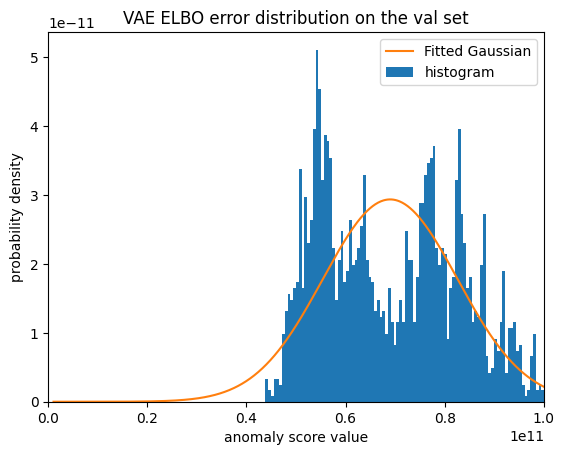

25% percentile: 56306689210.7588
75% percentile: 79964784576.729
These windows scored the top 1% of anomaly metric (97703840681.38307): 
[209 210 211 212 213 214 215 342 345 346 347 348 349 350 351 352 353 354
 355 356 357 358]


In [10]:
# Histogram of VAE ELBO loss - validation set
vae_elbo_m, vae_elbo_std = plot_histogram(val_vae_elbo_loss, 100, 
                                          'VAE ELBO error distribution on the val set', 
                                          mean=None, std=None, xlim=None)

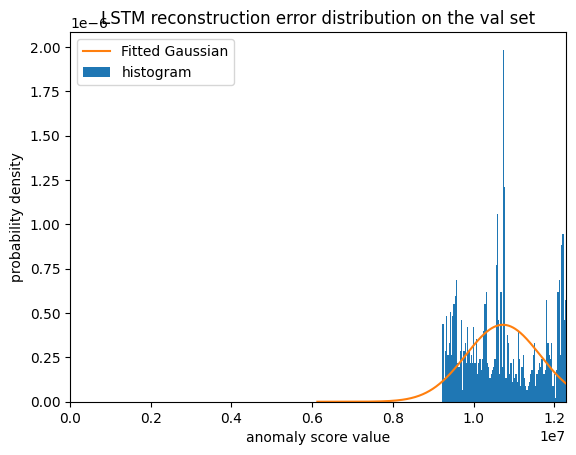

25% percentile: 9944884.037610572
75% percentile: 11525671.58334545
These windows scored the top 1% of anomaly metric (12270699.376018183): 
[  25   52   80  180  323  361  746  775  804  934 1006 1059 1084 1199
 1283]


In [11]:
# Histogram of LSTM reconstruction error - validation set 
#  --> to decide the anomaly detection threshold
lstm_recons_m, lstm_recons_std = plot_histogram(val_lstm_recons_error, 100,  
                                              'LSTM reconstruction error distribution on the val set', 
                                              mean=None, std=None, xlim=None)

In [12]:
# Evaluate the anomaly metrics on the test windows and sequences
n_test_lstm = test_seq.shape[0]

test_lstm_recons_error, test_lstm_embedding_error = np.zeros(n_test_lstm), np.zeros(n_test_lstm)
for i in range(n_test_lstm):
    test_lstm_recons_error[i], test_lstm_embedding_error[i] = evaluate_lstm_anomaly_metric_for_a_seq(test_seq[i])
print("All windows' reconstruction error is computed.")
print("The total number of windows is {}".format(len(test_lstm_recons_error)))

All windows' reconstruction error is computed.
The total number of windows is 14794


25% percentile: 11268027.819067929
75% percentile: 13703352.295431904
These windows scored the top 1% of anomaly metric (14492878.076135831): 
[3350 3351 3352 3353 3354 3355 3356 3357 3358 3359 3360 3361 3362 3363
 3364 3365 3366 3367 3368 3369 3370 3371 3372 3373 3374 3375 3376 3377
 3378 3379 3380 3381 3382 3383 3384 3385 3386 3387 3388 3389 3390 3391
 3392 3393 3394 3395 3396 3397 3398 3399 3400 3401 3402 3403 3404 3405
 3406 3407 3408 3409 3410 3411 3412 3413 3414 3415 3416 3417 3418 3419
 3420 3421 3422 3423 3424 3425 3426 3427 3428 3429 3430 3431 3432 3433
 3434 3435 3436 3437 3438 3439 3440 3441 3442 3443 3444 3445 3446 3447
 3448 3449 3450 3451 3452 3453 3454 3455 3456 3457 3458 3459 3460 3461
 3462 3463 3464 3465 3466 3467 3468 3469 3470 3471 3472 3473 3474 3475
 3476 3477 3478 3479 3480 3481 3482 3483 3484 3485 3486 3487 3488 3489
 3490 3491 3492 3493 3494 3495 3496 3497]


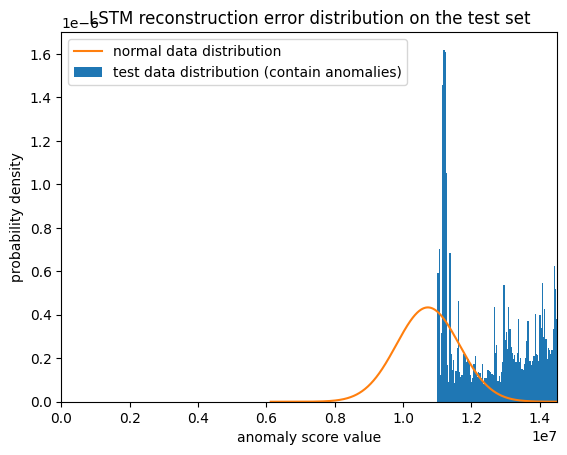

In [13]:
# Histogram of LSTM reconstruction error - test set 
#  --> to detect anomaly now
_, _ = plot_histogram(test_lstm_recons_error, 100,
                      'LSTM reconstruction error distribution on the test set', 
                      mean=lstm_recons_m, std=lstm_recons_std, xlim=None, saveplot=True)

In [14]:
# Produce the ground truth anomaly indices 
# if result['idx_split'][0] == 0:
#     idx_anomaly_test = result['idx_anomaly_test']
# else:
#     idx_anomaly_test = result['idx_anomaly_test'][0]
result['idx_anomaly_test'] = [1660925946]
idx_anomaly_test = result['idx_anomaly_test']    
anomaly_index_lstm = []
test_labels_lstm = np.zeros(n_test_lstm)
for i in range(len(idx_anomaly_test)):
    idx_start = idx_anomaly_test[i]-(config['l_win']*config['l_seq']-1)
    idx_end = idx_anomaly_test[i]+1
    if idx_start < 0:
        idx_start = 0
    if idx_end > n_test_lstm:
        idx_end = n_test_lstm
    anomaly_index_lstm.append(np.arange(idx_start,idx_end))
    test_labels_lstm[idx_start:idx_end] = 1
    
print(test_labels_lstm.shape)

(14794,)


In [15]:
def return_anomaly_idx_by_threshold(test_anomaly_metric, threshold):
    test_list = np.squeeze(np.ndarray.flatten(test_anomaly_metric))
    idx_error = np.squeeze(np.argwhere(test_anomaly_metric > threshold))
    
    if len(idx_error.shape) == 0:
        idx_error = np.expand_dims(idx_error, 0)
    
    return list(idx_error)

In [16]:
def augment_detected_idx(idx_detected_anomaly, anomaly_index):
    n_anomaly = len(anomaly_index)
    idx_detected_anomaly_extended = list(idx_detected_anomaly)
    for i in range(n_anomaly):
        #print(idx_detected_anomaly)
        for j in idx_detected_anomaly:
            if j in anomaly_index[i]:
                in_original_detection = set(idx_detected_anomaly_extended)
                currect_anomaly_win = set(anomaly_index[i])
                idx_detected_anomaly_extended = idx_detected_anomaly_extended + list(currect_anomaly_win - in_original_detection)
                #print(j)
                break
                
    return list(np.sort(idx_detected_anomaly_extended))

In [17]:
def count_TP_FP_FN(idx_detected_anomaly, anomaly_index, test_labels):
    n_TP = 0
    n_FP = 0
    n_detection = len(idx_detected_anomaly)
    for i in range(n_detection):
        if test_labels[idx_detected_anomaly[i]] == 1:
            n_TP = n_TP + 1
        else:
            n_FP = n_FP + 1
    
    idx_undetected = list(set(np.arange(len(test_labels)))- set(idx_detected_anomaly))
    n_FN = 0
    for i in idx_undetected:
        if test_labels[i] == 1:
            n_FN = n_FN + 1
    
    return n_TP, n_FP, n_FN

In [18]:
def compute_precision_and_recall(idx_detected_anomaly, anomaly_index, test_labels):
    # compute true positive
    n_TP, n_FP, n_FN = count_TP_FP_FN(idx_detected_anomaly, anomaly_index, test_labels)
    
    if n_TP + n_FP == 0:
        precision = 1
    else:
        precision = n_TP / (n_TP + n_FP)
    recall = n_TP / (n_TP + n_FN)
    if precision + recall == 0:
        F1 = 0
    else:
        F1 = 2* (precision * recall)/(precision + recall)
    
    return precision, recall, F1, n_TP, n_FP, n_FN

In [19]:
n_threshold = 200
precision = np.zeros(n_threshold)
recall = np.zeros(n_threshold)
F1 = np.zeros(n_threshold)
precision_aug = np.zeros(n_threshold)
recall_aug = np.zeros(n_threshold)
F1_aug = np.zeros(n_threshold)
i = 0
threshold_list = np.linspace(np.amin(test_lstm_recons_error), np.amax(test_lstm_recons_error), n_threshold, endpoint=True)
threshold_list = np.flip(threshold_list)
for threshold in threshold_list:
    #print(threshold_list[i])
    idx_detection_lstm = return_anomaly_idx_by_threshold(test_lstm_recons_error, threshold)
#     precision[i], recall[i], F1[i], _, _, _ = compute_precision_and_recall(idx_detection_lstm, 
#                                                                            anomaly_index_lstm, 
#                                                                            test_labels_lstm)
#     # augment the detection using the ground truth labels
#     # a method to discount the factor one anomaly appears in multiple consecutive windows
#     # introduced in "Unsupervised anomaly detection via variational auto-encoder for seasonal kpis in web applications"
#     idx_detection_lstm_augmented = augment_detected_idx(idx_detection_lstm, anomaly_index_lstm)
#     precision_aug[i], recall_aug[i], F1_aug[i], _, _, _ = compute_precision_and_recall(idx_detection_lstm_augmented, 
#                                                                                        anomaly_index_lstm, 
#                                                                                        test_labels_lstm)
    i = i + 1
    #print(precision, recall, F1)

In [20]:
print("Best F1 score is {}".format(np.amax(F1)))
idx_best_threshold = np.squeeze(np.argwhere(F1 == np.amax(F1)))
print("Best threshold is {}".format(threshold_list[idx_best_threshold]))
print("At this threshold, precision is {}, recall is {}".format(precision[idx_best_threshold], recall[idx_best_threshold]))
average_precision = np.sum(precision[1:] * (recall[1:] - recall[:-1]))
print("Average precision is {}".format(average_precision))

print("\nAugmented detection:")
print("Best F1 score is {}".format(np.amax(F1_aug)))
idx_best_threshold = np.squeeze(np.argwhere(F1_aug == np.amax(F1_aug)))
print("Best threshold is {}".format(threshold_list[idx_best_threshold]))
print("At this threshold, precision is {}, recall is {}".format(precision_aug[idx_best_threshold], 
                                                                recall_aug[idx_best_threshold]))

average_precision_aug = np.sum(precision_aug[1:] * (recall_aug[1:] - recall_aug[:-1]))
print("Average precision is {}".format(average_precision_aug))

Best F1 score is 0.0
Best threshold is [14515932.84658519 14498269.93010219 14480607.01361919 14462944.09713619
 14445281.18065318 14427618.26417018 14409955.34768718 14392292.43120418
 14374629.51472118 14356966.59823818 14339303.68175518 14321640.76527217
 14303977.84878917 14286314.93230617 14268652.01582317 14250989.09934017
 14233326.18285717 14215663.26637416 14198000.34989116 14180337.43340816
 14162674.51692516 14145011.60044216 14127348.68395916 14109685.76747615
 14092022.85099315 14074359.93451015 14056697.01802715 14039034.10154415
 14021371.18506115 14003708.26857814 13986045.35209514 13968382.43561214
 13950719.51912914 13933056.60264614 13915393.68616313 13897730.76968013
 13880067.85319713 13862404.93671413 13844742.02023113 13827079.10374813
 13809416.18726513 13791753.27078212 13774090.35429912 13756427.43781612
 13738764.52133312 13721101.60485012 13703438.68836712 13685775.77188411
 13668112.85540111 13650449.93891811 13632787.02243511 13615124.10595211
 13597461.18

In [104]:
# Now select a threshold
threshold = 4399

print("Threshold is {}".format(threshold))
idx_detection = return_anomaly_idx_by_threshold(test_lstm_recons_error, 12500000)
idx_detection_augmented = augment_detected_idx(idx_detection, anomaly_index_lstm)
# precision, recall, F1, n_TP, n_FP, n_FN = compute_precision_and_recall(idx_detection_augmented, 
#                                                                        anomaly_index_lstm, 
#                                                                        test_labels_lstm)
# print("\nPR evaluation using augmented detection:")
# print("Precision: {}".format(precision))
# print("Recall: {}".format(recall))
# print("F1: {}".format(F1))
# print("TP: {}".format(n_TP))
# print("FP: {}".format(n_FP))
# print("FN: {}".format(n_FN))

Threshold is 4399


In [105]:
def slice_detected_indices_into_seq(idx_detection, interval):
    detected_seq = []
    i = 0
    while i < len(idx_detection):
        if i == 0:
            cur_seq = [idx_detection[i]]
            i = i + 1
        else:
            if idx_detection[i] - idx_detection[i-1] > interval:
                detected_seq.append(cur_seq)
                cur_seq = [idx_detection[i]]
            else:
                cur_seq.append(idx_detection[i])
                if i == len(idx_detection) - 1:
                    detected_seq.append(cur_seq)
            i = i + 1
    
    print("Detected {} sequences".format(len(detected_seq)))
    return detected_seq

In [106]:
def plot_detected_anomalies(idx_detection, interval, dataset, result, detection_method, augmented_flag=1, y_scale=5, y_lim=None):
    detected_seq = slice_detected_indices_into_seq(idx_detection, interval=interval)
    listt = list(result["t"])
    detected_seq = [ [listt[i] for i in D] for D in detected_seq ]
    
    t_test = result['t_val']
    print(f"maxX = {max(t_test)+10000}")
    test = result['val']
    idx_anomaly_test = result['idx_anomaly_test']
        
    # plot detected sequences
    fig, axs = plt.subplots(1, 1, figsize=(18, 5), edgecolor='k')
    fig.subplots_adjust(hspace=.4, wspace=.4)
    axs.plot(t_test, test)
    #plt.show()
    for j in range(len(idx_anomaly_test)):
        if j == 0:
            print(f"plotting on {idx_anomaly_test[j]}")
            axs.plot(idx_anomaly_test[j] * np.ones(20), np.linspace(-y_scale, y_scale, 20), 'r--', label='true anomalies')
        else:
            axs.plot(idx_anomaly_test[j] * np.ones(20), np.linspace(-y_scale, y_scale, 20), 'r--')
        
    for i in range(len(detected_seq)):
        for j in detected_seq[i]:
            if j == detected_seq[0][0]:
                axs.plot((j+interval*2) * np.ones(20), np.linspace(-y_scale, -0.8*y_scale, 20), 'g-', label='detected anomalies')
            else:
                axs.plot((j+interval*2) * np.ones(20), np.linspace(-y_scale, -0.8*y_scale, 20), 'g-')
    
    for j in range(len(idx_anomaly_test)):
        axs.plot(idx_anomaly_test[j] * np.ones(20), np.linspace(-y_scale, y_scale, 20), 'r--')
    
    for i in range(len(detected_seq)):
        interval_x = np.asarray([detected_seq[i][0], detected_seq[i][-1]+interval*2])
        interval_y = np.asarray([y_scale,y_scale])
        if i == 0:
            axs.fill_between(interval_x, interval_y, alpha=0.2, color='y', label='detected anomaly windows')
        else:
            axs.fill_between(interval_x, interval_y, alpha=0.2, color='y')
        interval_y = np.asarray([-y_scale,-y_scale])
        axs.fill_between(interval_x, interval_y, alpha=0.2, color='y')
    axs.grid(True)
    axs.set_xlim(min(t_test)-10000, max(t_test)+10000)
    if y_lim is None:
        axs.set_ylim(-60, y_scale)
    else:
        axs.set_ylim(-60, y_lim)
    axs.set_xlabel("timestamp (every {})".format(result['t_unit']))
    axs.set_ylabel("normalised readings")
    axs.set_title("{} dataset test sequence\n(normalised by train mean {:.4f} and std {:.4f})\n Detection method: {}".format(dataset, 
                                                                                        result['train_m'], 
                                                                                        result['train_std'],
                                                                                        detection_method))
    axs.legend()
    savefig(config['result_dir']+'detected_anomalies_{}_aug_{}.pdf'.format(detection_method, augmented_flag))

Detected 1 sequences
maxX = 1659937851300
plotting on 1660925946


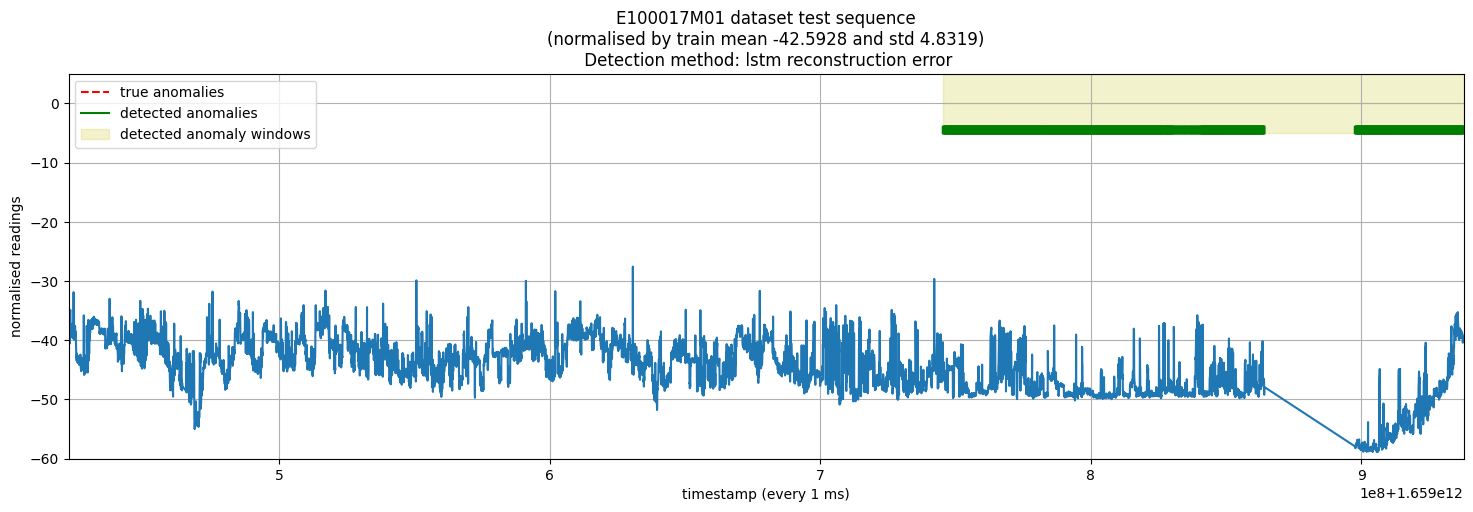

In [107]:
plot_detected_anomalies(idx_detection_augmented, 
                        interval=config['l_win']*config['l_seq']/2, 
                        dataset=dataset, 
                        result=result, 
                        detection_method='lstm reconstruction error',
                        augmented_flag=1,
                        y_scale=5,
                        y_lim=5)